In [1]:
#Modules.
import Functions as fun

%matplotlib inline
%pylab inline

#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Parameters.

sweepVc = arange(0,0.71,0.01)

In [3]:
#Read data from SweepVc-Peaks.
meanFinalDet = fun.readData('data/sweepVc-meanFinalDet')
meanProbOutDet = fun.readData('data/sweepVc-meanProbOutDet')
meanPeakDet = fun.readData('data/sweepVc-meanPeakDet')

meanFinal = fun.readData('data/sweepVc-meanFinal')
meanProbOut = fun.readData('data/sweepVc-meanProbOut')
meanPeak = fun.readData('data/sweepVc-meanPeak')

FinalSizeDeterministicDirect = fun.readData('data/sweepVcDeterministicDirect-Peak')

In [4]:
#Functions.

def giveBoundaries(y):
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]


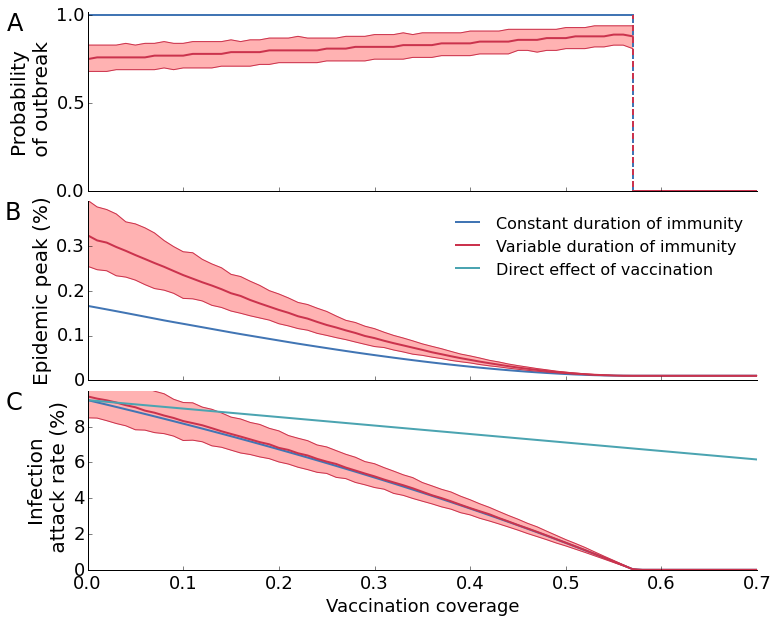

In [17]:
fig = plt.figure(figsize=(12,10))

#--------------------------------------------------------------------------
ax = fig.add_subplot(311)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)

Vcrit = 58
xPos = sweepVc[Vcrit-1]
ax.plot(sweepVc[:Vcrit],meanProbOutDet[:Vcrit], color=myColors[9])
ax.plot([xPos,xPos],[0,1],'--', color=myColors[9])

ax.plot([xPos,xPos],[0.02,1],'--', color=myColors[1])
ax.plot([xPos,0.71],[0,0], color=myColors[1])

lower, median, upper = giveBoundaries(meanProbOut)
ax.plot(sweepVc[:Vcrit], median[:Vcrit], color=myColors[1])
ax.plot(sweepVc[:Vcrit],lower[:Vcrit], sweepVc[:Vcrit], upper[:Vcrit], linewidth=1,color=myColors[1])
ax.fill_between(sweepVc[:Vcrit], lower[:Vcrit], upper[:Vcrit], color=[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.7])
ax.set_xticklabels([])

ax.set_ylim([0,1.02])
ax.set_yticks([0,0.5,1])

ax.set_ylabel('Probability\n of outbreak', fontsize = 20)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(312)
text(-0.12, 0.9,'B',transform = ax.transAxes, fontsize = 24)

ax.plot(sweepVc,meanPeakDet, linewidth=2, color=myColors[9])

lower, median, upper = giveBoundaries(meanPeak)
ax.plot(sweepVc, median, color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.7])
ax.set_xticklabels([])

ax.set_ylim([0,0.004])
ax.set_yticks([0,0.001,0.002,0.003])
ax.set_yticklabels([0,0.1,0.2,0.3])

ax.set_ylabel('Epidemic peak (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, color=myColors[9],label='Constant duration of immunity')
ax.plot(-1, -1, color=myColors[1],label='Variable duration of immunity')
ax.plot(-1, -1, color=myColors[8],label='Direct effect of vaccination')
ax.legend(fontsize = 16, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(313)
text(-0.12, 0.9,'C',transform = ax.transAxes, fontsize = 24)

ax.plot(sweepVc,meanFinalDet, color=myColors[9])

lower, median, upper = giveBoundaries(meanFinal)
ax.plot(sweepVc, median, color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])

ax.plot(sweepVc,FinalSizeDeterministicDirect, color=myColors[8])

ax.set_xlim([0,0.7])

ax.set_ylim([0,0.1])
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels(['0','2','4','6','8'])

ax.set_xlabel('Vaccination coverage')
ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

fun.removeFrame(ax)

subplots_adjust(hspace = 0.06)

show()


#Save figure.
if True:
    fig.savefig('figures/sweepVcOneyear.eps')
    fig.savefig('figures/sweepVcOneyear.png')